In [110]:
# Importing requred libraries
import numpy as np
import pandas as pd
from numpy.random import randn as rn
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
import random

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Smart Watchs on Flipkart Analysis

In [113]:
### Empty List Declaration
Name = []
Brand = []
Price = []
Star_Ratings = []
No_of_Ratings = []
No_of_Reviews = []
Dial_Shape = []
Strap_Color = []
Battery_Life = []
Call_Function = []
Bluetooth_Version = []
Display_Resolution = []
Display_Size = []
Weight = []
Battery_Type = []
Operating_System = []
Internal_Memory = []
GPS = []
Model = []

## Web Scrapping

status=0
URLs=[]
print('No of URLs Processed:', end = " ")
for x in range(1,13):
    Link = "https://www.flipkart.com/wearable-smart-devices/smart-watches/pr?sid=ajy%2Cbuh&page="+str(x)
    r = requests.get(Link)
    soup = BeautifulSoup(r.content)
    a = soup.find_all('a',class_="_2UzuFa")
    for y in range(0,40):
        page_link='https://www.flipkart.com'+(a[y].get('href'))
        URLs.append(page_link)
        
for ind in range(0,len(URLs)):
    r = requests.get(URLs[ind])
    
    soup = BeautifulSoup(r.content)

    overall_name = soup.find('span',class_='B_NuCI').text

    if "\xa0\xa0" in overall_name:
        Name2 = re.findall('.*(?=\xa0\xa0)',overall_name)[0]
    else:
        Name2 = overall_name

    Price1 = soup.find('div', class_="_30jeq3 _16Jk6d").text

    if ',' in Price1:
        Price2 = Price1.replace(',','')[1:]
    else:
        Price2 = Price1[1:]

    Star_Ratings2 = float(soup.find('div', class_='_3LWZlK').text)

    
    if soup.find('span', class_='_2_R_DZ') is None:
        No_of_Ratings2 = No_of_Reviews2 = 0
    else:
        Ratings_and_Reviews = soup.find('span', class_='_2_R_DZ').text
        No_of_Ratings2 = int((re.findall('.*(?= Ratings)',Ratings_and_Reviews)[0]).replace(",", ""))
        No_of_Reviews2 = int((re.findall('(?<=\xa0&\xa0).*[0-9]',Ratings_and_Reviews)[0]).replace(",", ""))

    
    specs_name = soup.find_all('td',class_="_1hKmbr col col-3-12")
    specs_details = soup.find_all('li',class_='_21lJbe')
    
    specs_details_list = []
    specs_list = ['Model Name','Dial Shape','Strap Color','Battery Life','Operating System','Internal Memory','Bluetooth Version','Display Resolution','Display Size','Weight','Call Function','Battery Type','GPS']

    for specs_index in range(0,len(specs_list)):
        specs_list_name = specs_list[specs_index]
        for index_range in range(0,len(specs_name)):    
            if specs_name[index_range].text == specs_list_name:
                specs_details_list.append(specs_details[index_range].text)
                break
        if index_range==len(specs_name)-1:
            specs_details_list.append('np.nan')
    

    if Name2[len(Name2)-10:len(Name2)] == 'Smartwatch':
        brand_len=len(Name2)-len(specs_details_list[0])-12
        Brand2 = Name2[0:brand_len]
    else:
        brand_len=len(Name2)-len(specs_details_list[0])
        Brand2 = Name2[0:brand_len]
       
    # Appending values to list
    Name.append(Name2)
    Brand.append(Brand2)
    Price.append(Price2)
    Star_Ratings.append(Star_Ratings2)
    No_of_Ratings.append(No_of_Ratings2)
    No_of_Reviews.append(No_of_Reviews2)
    Dial_Shape.append(specs_details_list[1])
    Strap_Color.append(specs_details_list[2])
    Model.append(specs_details_list[0])
    Battery_Life.append(specs_details_list[3])
    Call_Function.append(specs_details_list[10])
    Bluetooth_Version.append(specs_details_list[6])
    Display_Resolution.append(specs_details_list[7])
    Display_Size.append(specs_details_list[8])
    Weight.append(specs_details_list[9])
    Battery_Type.append(specs_details_list[11])
    Operating_System.append(specs_details_list[4])
    Internal_Memory.append(specs_details_list[5])
    GPS.append(specs_details_list[12])
    status=status+1
    print(status,end=" ")

No of URLs Processed: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 27

In [152]:
smart_watch = pd.DataFrame({'Name':Name,'Brand':Brand,'Price':Price,'Star_Ratings':Star_Ratings,'Dial_Shape':Dial_Shape,'Strap_Color':Strap_Color,'Model':Model,'Battery_Life':Battery_Life,'Call_Function':Call_Function,'Bluetooth_Version':Bluetooth_Version,'Display_Resolution':Display_Resolution,'Display_Size':Display_Size,'Weight':Weight,'Battery_Type':Battery_Type,'Operating_System':Operating_System,'Internal_Memory':Internal_Memory,'GPS':GPS,'No_of_Ratings':No_of_Ratings,'No_of_Reviews':No_of_Reviews})

In [153]:
df = smart_watch
df

,Name,Brand,Price,Star_Ratings,Dial_Shape,Strap_Color,Model,Battery_Life,Call_Function,Bluetooth_Version,Display_Resolution,Display_Size,Weight,Battery_Type,Operating_System,Internal_Memory,GPS,No_of_Ratings,No_of_Reviews
0,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1299,4.1,Square,Orange,"Crown 1.95'' Screen, BT Calling, Working Crown...",Upto 5 Days,Yes,v5.2,240 x 283 Pixel,49.53 mm,np.nan,Lithium Polymer,np.nan,np.nan,np.nan,43772,4441
1,Fire-Boltt Ninja Pro Max Plus 1.83 Smartwatch,Fire-Boltt,1099,4.0,Square,Black,Ninja Pro Max Plus 1.83,Upto 8 days,No,v5.0,240 x 284 Pixel,1.83 Inch,45 g,Lithium Ion,np.nan,np.nan,No,185695,27262
2,Noise Colorfit Icon 2 1.8'' Display with Bluet...,Noise,1199,4.1,Rectangle,Black,Colorfit Icon 2 1.8'' Display with Bluetooth C...,7 Days,Yes,np.nan,240 x 286 pixel,1.8 inch,np.nan,np.nan,np.nan,np.nan,np.nan,412996,27254
3,beatXP Marv Neo 1.85'' HD Display Bluetooth Ca...,beatXP,1299,4.1,Square,Black,Marv Neo 1.85'' HD Display Bluetooth Calling S...,Upto 7 days,Yes,BT 5.1 + BT 3.0,240*280 pixel,4.6 cm,150 g,Lithium Ion,np.nan,np.nan,np.nan,69000,7226
4,beatXP Marv Neo 1.85'' HD Display with BT Call...,beatXP,1499,4.0,Square,Black,"Marv Neo 1.85'' HD Display with BT Calling, Me...",Upto 7 Days,np.nan,np.nan,240*280 pixel,46.99 mm,np.nan,Yes,np.nan,np.nan,np.nan,1233,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,beatXP Marv Ace 1.85'' HD Always On Display BT...,beatXP,999,3.9,Square,Silver,Marv Ace 1.85'' HD Always On Display BT Callin...,Upto 7 days,np.nan,np.nan,240 x 284 pixel,46.99 mm,np.nan,Yes,np.nan,np.nan,np.nan,17021,1556
476,"Boult Drift+ Bluetooth Calling, 1.85"" HD, 500N...",Boult,1099,4.1,Rectangle,White,"Drift+ Bluetooth Calling, 1.85"" HD, 500Nits Br...",Upto 7 Days,Yes,np.nan,240 x 280 Pixels,1.85 inch,42 g,Lithium Ion,np.nan,np.nan,No,183350,14403
477,"Fireboltt Phoenix AMOLED 1.43"" Display Smart W...",Fireboltt,2399,3.8,Round,Black,"Phoenix AMOLED 1.43"" Display Smart Watch, with...",upto 7 days,Yes,np.nan,466*466 pixel,36.3 mm,66.5 g,Lithium Ion,np.nan,np.nan,np.nan,4,1
478,"Boult Sterling Pro BT Calling, 1.43"" AMOLED, 8...",Boult,2199,4.1,Round,Silver,"Sterling Pro BT Calling, 1.43"" AMOLED, 800 Nit...",Upto 7 Days,Yes,v5.2,466 x 466 Pixels,36.32 mm,np.nan,Lithium Polymer,np.nan,np.nan,No,3401,357


In [132]:
df.to_csv('watches_23rd.csv')

In [133]:
df.shape

(480, 19)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                480 non-null    object 
 1   Brand               480 non-null    object 
 2   Price               480 non-null    object 
 3   Star_Ratings        480 non-null    float64
 4   Dial_Shape          480 non-null    object 
 5   Strap_Color         480 non-null    object 
 6   Model               480 non-null    object 
 7   Battery_Life        480 non-null    object 
 8   Call_Function       480 non-null    object 
 9   Bluetooth_Version   480 non-null    object 
 10  Display_Resolution  480 non-null    object 
 11  Display_Size        480 non-null    object 
 12  Weight              480 non-null    object 
 13  Battery_Type        480 non-null    object 
 14  Operating_System    480 non-null    object 
 15  Internal_Memory     480 non-null    object 
 16  GPS     

In [135]:
pd.isnull(df).sum()

Name                  0
Brand                 0
Price                 0
Star_Ratings          0
Dial_Shape            0
Strap_Color           0
Model                 0
Battery_Life          0
Call_Function         0
Bluetooth_Version     0
Display_Resolution    0
Display_Size          0
Weight                0
Battery_Type          0
Operating_System      0
Internal_Memory       0
GPS                   0
No_of_Ratings         0
No_of_Reviews         0
dtype: int64

In [155]:
df.columns

Index(['Name', 'Brand', 'Price', 'Star_Ratings', 'Dial_Shape', 'Strap_Color',
       'Model', 'Battery_Life', 'Call_Function', 'Bluetooth_Version',
       'Display_Resolution', 'Display_Size', 'Weight', 'Battery_Type',
       'Operating_System', 'Internal_Memory', 'GPS', 'No_of_Ratings',
       'No_of_Reviews'],
      dtype='object')

### Data Cleaning

In [156]:
Battery_Life1 = df['Battery_Life']
Battery_Life2 = []

for z in range(0,len(Battery_Life)):
    days = re.findall('[0-9]+',Battery_Life1[z])
    sum1=0
    for y in range(0,len(days)):
        sum1=sum1+int(days[y])
    avg1=sum1/len(days)
    Battery_Life2.append(round(avg1))

In [157]:
dsize = df['Display_Size']
dsize1=[]
for x in range(0,480):
    value = re.findall('.*(?=mm)',dsize[x])
    factor = 1
    if len(value) == 0:
        value = re.findall('.*(?=cm)',dsize[x])
        factor = 10
        if len(value) ==0:
            value = re.findall('.*(?=[A-z]nch)',dsize[x])
            factor = 25.4
    if len(value) == 2:
        app=round(float(value[0])*factor,2)
        dsize1.append(app)
    else:
        dsize1.append('')

In [158]:
bver = Bluetooth_Version
blist = []
nan = 'np.nan'
for x in range(0,480):
    value = re.findall('[0-9].[0-9]',bver[x])
    if len(value) == 2:
        value = re.findall('[0-9]',bver[x])
    if len(value) == 0:
        blist.append(nan)
    else:
        blist.append(float(value[0]))

In [159]:
dres = df['Display_Resolution']
dres1 = []

for x in range (0,480):
    value = re.findall('[0-9]{3,4}',dres[x])
    if len(value)==2:
        value1 = (value[0]+' x '+value[1])
        dres1.append(value1)
    else:
        dres1.append(value)

In [161]:
weight = df['Weight']
w1 = []

for x in range (0,480):
    w1.append(weight[x].replace(' g',''))
    

In [162]:
smart_watch = pd.DataFrame({'Name':Name,'Brand':Brand,'Price':Price,'Star_Ratings':Star_Ratings,'Dial_Shape':Dial_Shape,'Strap_Color':Strap_Color,'Model':Model,'Battery_Life':Battery_Life2,'Call_Function':Call_Function,'Bluetooth_Version':blist,'Display_Resolution':dres1,'Display_Size':dsize1,'Weight':w1,'Battery_Type':Battery_Type,'Operating_System':Operating_System,'Internal_Memory':Internal_Memory,'GPS':GPS,'No_of_Ratings':No_of_Ratings,'No_of_Reviews':No_of_Reviews})

In [163]:
df = smart_watch
df

,Name,Brand,Price,Star_Ratings,Dial_Shape,Strap_Color,Model,Battery_Life,Call_Function,Bluetooth_Version,Display_Resolution,Display_Size,Weight,Battery_Type,Operating_System,Internal_Memory,GPS,No_of_Ratings,No_of_Reviews
0,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1299,4.1,Square,Orange,"Crown 1.95'' Screen, BT Calling, Working Crown...",5,Yes,5.2,240 x 283,49.53,np.nan,Lithium Polymer,np.nan,np.nan,np.nan,43772,4441
1,Fire-Boltt Ninja Pro Max Plus 1.83 Smartwatch,Fire-Boltt,1099,4.0,Square,Black,Ninja Pro Max Plus 1.83,8,No,5.0,240 x 284,46.48,45,Lithium Ion,np.nan,np.nan,No,185695,27262
2,Noise Colorfit Icon 2 1.8'' Display with Bluet...,Noise,1199,4.1,Rectangle,Black,Colorfit Icon 2 1.8'' Display with Bluetooth C...,7,Yes,np.nan,240 x 286,45.72,np.nan,np.nan,np.nan,np.nan,np.nan,412996,27254
3,beatXP Marv Neo 1.85'' HD Display Bluetooth Ca...,beatXP,1299,4.1,Square,Black,Marv Neo 1.85'' HD Display Bluetooth Calling S...,7,Yes,5.0,240 x 280,46.0,150,Lithium Ion,np.nan,np.nan,np.nan,69000,7226
4,beatXP Marv Neo 1.85'' HD Display with BT Call...,beatXP,1499,4.0,Square,Black,"Marv Neo 1.85'' HD Display with BT Calling, Me...",7,np.nan,np.nan,240 x 280,46.99,np.nan,Yes,np.nan,np.nan,np.nan,1233,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,beatXP Marv Ace 1.85'' HD Always On Display BT...,beatXP,999,3.9,Square,Silver,Marv Ace 1.85'' HD Always On Display BT Callin...,7,np.nan,np.nan,240 x 284,46.99,np.nan,Yes,np.nan,np.nan,np.nan,17021,1556
476,"Boult Drift+ Bluetooth Calling, 1.85"" HD, 500N...",Boult,1099,4.1,Rectangle,White,"Drift+ Bluetooth Calling, 1.85"" HD, 500Nits Br...",7,Yes,np.nan,240 x 280,46.99,42,Lithium Ion,np.nan,np.nan,No,183350,14403
477,"Fireboltt Phoenix AMOLED 1.43"" Display Smart W...",Fireboltt,2399,3.8,Round,Black,"Phoenix AMOLED 1.43"" Display Smart Watch, with...",7,Yes,np.nan,466 x 466,36.3,66.5,Lithium Ion,np.nan,np.nan,np.nan,4,1
478,"Boult Sterling Pro BT Calling, 1.43"" AMOLED, 8...",Boult,2199,4.1,Round,Silver,"Sterling Pro BT Calling, 1.43"" AMOLED, 800 Nit...",7,Yes,5.2,466 x 466,36.32,np.nan,Lithium Polymer,np.nan,np.nan,No,3401,357


In [164]:
pd.isnull(df).sum()

Name                  0
Brand                 0
Price                 0
Star_Ratings          0
Dial_Shape            0
Strap_Color           0
Model                 0
Battery_Life          0
Call_Function         0
Bluetooth_Version     0
Display_Resolution    0
Display_Size          0
Weight                0
Battery_Type          0
Operating_System      0
Internal_Memory       0
GPS                   0
No_of_Ratings         0
No_of_Reviews         0
dtype: int64

In [165]:
df = df.replace('np.nan',np.nan)
df.head()

,Name,Brand,Price,Star_Ratings,Dial_Shape,Strap_Color,Model,Battery_Life,Call_Function,Bluetooth_Version,Display_Resolution,Display_Size,Weight,Battery_Type,Operating_System,Internal_Memory,GPS,No_of_Ratings,No_of_Reviews
0,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1299,4.1,Square,Orange,"Crown 1.95'' Screen, BT Calling, Working Crown...",5,Yes,5.2,240 x 283,49.53,NaN,Lithium Polymer,NaN,NaN,NaN,43772,4441
1,Fire-Boltt Ninja Pro Max Plus 1.83 Smartwatch,Fire-Boltt,1099,4.0,Square,Black,Ninja Pro Max Plus 1.83,8,No,5.0,240 x 284,46.48,45,Lithium Ion,NaN,NaN,No,185695,27262
2,Noise Colorfit Icon 2 1.8'' Display with Bluet...,Noise,1199,4.1,Rectangle,Black,Colorfit Icon 2 1.8'' Display with Bluetooth C...,7,Yes,NaN,240 x 286,45.72,NaN,NaN,NaN,NaN,NaN,412996,27254
3,beatXP Marv Neo 1.85'' HD Display Bluetooth Ca...,beatXP,1299,4.1,Square,Black,Marv Neo 1.85'' HD Display Bluetooth Calling S...,7,Yes,5.0,240 x 280,46.0,150,Lithium Ion,NaN,NaN,NaN,69000,7226
4,beatXP Marv Neo 1.85'' HD Display with BT Call...,beatXP,1499,4.0,Square,Black,"Marv Neo 1.85'' HD Display with BT Calling, Me...",7,NaN,NaN,240 x 280,46.99,NaN,Yes,NaN,NaN,NaN,1233,120


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                480 non-null    object 
 1   Brand               480 non-null    object 
 2   Price               480 non-null    object 
 3   Star_Ratings        480 non-null    float64
 4   Dial_Shape          480 non-null    object 
 5   Strap_Color         480 non-null    object 
 6   Model               480 non-null    object 
 7   Battery_Life        480 non-null    int64  
 8   Call_Function       430 non-null    object 
 9   Bluetooth_Version   318 non-null    float64
 10  Display_Resolution  480 non-null    object 
 11  Display_Size        480 non-null    object 
 12  Weight              306 non-null    object 
 13  Battery_Type        368 non-null    object 
 14  Operating_System    47 non-null     object 
 15  Internal_Memory     8 non-null      object 
 16  GPS     

In [167]:
pd.isnull(df).sum()

Name                    0
Brand                   0
Price                   0
Star_Ratings            0
Dial_Shape              0
Strap_Color             0
Model                   0
Battery_Life            0
Call_Function          50
Bluetooth_Version     162
Display_Resolution      0
Display_Size            0
Weight                174
Battery_Type          112
Operating_System      433
Internal_Memory       472
GPS                   183
No_of_Ratings           0
No_of_Reviews           0
dtype: int64

In [168]:
df = df.fillna(method= 'bfill' )
pd.isnull(df).sum()

Name                   0
Brand                  0
Price                  0
Star_Ratings           0
Dial_Shape             0
Strap_Color            0
Model                  0
Battery_Life           0
Call_Function          0
Bluetooth_Version      1
Display_Resolution     0
Display_Size           0
Weight                 2
Battery_Type           1
Operating_System       7
Internal_Memory       11
GPS                    1
No_of_Ratings          0
No_of_Reviews          0
dtype: int64

In [169]:
df = df.fillna(method= 'pad' )
pd.isnull(df).sum()

Name                  0
Brand                 0
Price                 0
Star_Ratings          0
Dial_Shape            0
Strap_Color           0
Model                 0
Battery_Life          0
Call_Function         0
Bluetooth_Version     0
Display_Resolution    0
Display_Size          0
Weight                0
Battery_Type          0
Operating_System      0
Internal_Memory       0
GPS                   0
No_of_Ratings         0
No_of_Reviews         0
dtype: int64

In [171]:
df.describe().round(1)
df=df1

,Star_Ratings,Battery_Life,Bluetooth_Version,No_of_Ratings,No_of_Reviews
count,480.0,480.0,480.0,480.0,480.0
mean,4.1,7.8,5.0,90745.7,10646.2
std,0.2,8.3,0.3,107779.4,12896.2
min,3.4,1.0,2.1,0.0,0.0
25%,4.0,5.0,5.0,7727.0,793.0
50%,4.1,7.0,5.0,33581.0,4441.0
75%,4.2,7.0,5.1,183350.0,14403.0
max,4.8,168.0,5.3,446721.0,52785.0


In [172]:
## watches above 50% customer satisfaction
df=df1[(df1['Star_Ratings']>=4.1) & (df1['No_of_Reviews']>=4177) & (df1['No_of_Ratings']>=35642)]
df

,Name,Brand,Price,Star_Ratings,Dial_Shape,Strap_Color,Model,Battery_Life,Call_Function,Bluetooth_Version,Display_Resolution,Display_Size,Weight,Battery_Type,Operating_System,Internal_Memory,GPS,No_of_Ratings,No_of_Reviews
0,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1399,4.1,Square,Orange,"Crown 1.95'' Screen, BT Calling, Working Crown...",5,Yes,5.2,240 x 283,49.53,NaN,Lithium Polymer,NaN,NaN,NaN,43719,4438
2,Noise Colorfit Icon 2 1.8'' Display with Bluet...,Noise,1499,4.1,Rectangle,Black,Colorfit Icon 2 1.8'' Display with Bluetooth C...,7,Yes,NaN,240 x 286,45.72,NaN,NaN,NaN,NaN,NaN,412996,27254
4,Noise Colorfit Icon 2 1.8'' Display with Bluet...,Noise,1499,4.1,Rectangle,Blue,Colorfit Icon 2 1.8'' Display with Bluetooth C...,7,Yes,NaN,240 x 286,45.72,NaN,NaN,NaN,NaN,NaN,412996,27254
5,"Fire-Boltt Hurricane 1.3"" Curved Glass Display...",Fire-Boltt,1499,4.1,Round,Grey,"Hurricane 1.3"" Curved Glass Display with 360 H...",11,No,5.0,240 x 240,1.3,36,Lithium Ion,NaN,NaN,No,190799,25982
6,beatXP Marv Neo 1.85'' HD Display Bluetooth Ca...,beatXP,1299,4.1,Square,Black,Marv Neo 1.85'' HD Display Bluetooth Calling S...,7,Yes,5.0,240 x 280,46.0,150,Lithium Ion,NaN,NaN,NaN,69000,7226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1399,4.1,Square,Orange,"Crown 1.95'' Screen, BT Calling, Working Crown...",5,Yes,5.2,240 x 283,49.53,NaN,Lithium Polymer,NaN,NaN,NaN,43719,4438
446,"Fire-Boltt Talk 1.28""Bluetooth Calling with Sp...",Fire-Boltt,1599,4.1,Round,Black,"Talk 1.28""Bluetooth Calling with SpO2, Metal B...",15,Yes,5.0,240 x 240,32.51,60,Lithium Ion,NaN,NaN,No,288859,52785
449,"Boult Drift Pro 1.78"" AMOLED, BT Calling, 800N...",Boult,2299,4.1,Rectangle,Black,"Drift Pro 1.78"" AMOLED, BT Calling, 800Nits Br...",7,Yes,NaN,368 x 448,45.21,47.1,Lithium Polymer,NaN,NaN,No,183350,14403
451,"Boult Crown 1.95'' Screen, BT Calling, Working...",Boult,1399,4.1,Square,Black,"Crown 1.95'' Screen, BT Calling, Working Crown...",5,Yes,5.2,240 x 283,49.53,NaN,Lithium Polymer,NaN,NaN,NaN,43719,4438


<Axes: >

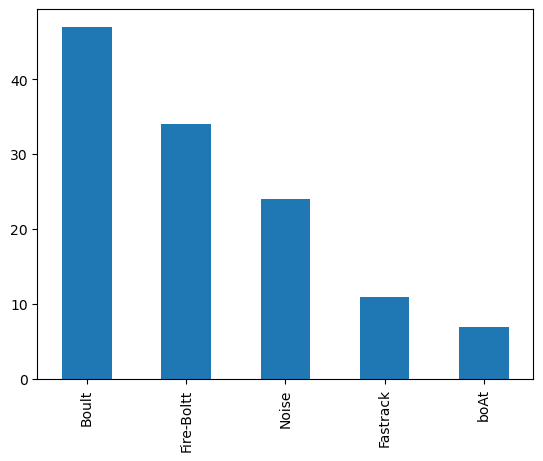

In [173]:
### Univarient Bar Plot
## Top 5 most selling Brands 
df['Brand'].value_counts().head().plot.bar()

<Figure size 1200x500 with 0 Axes>

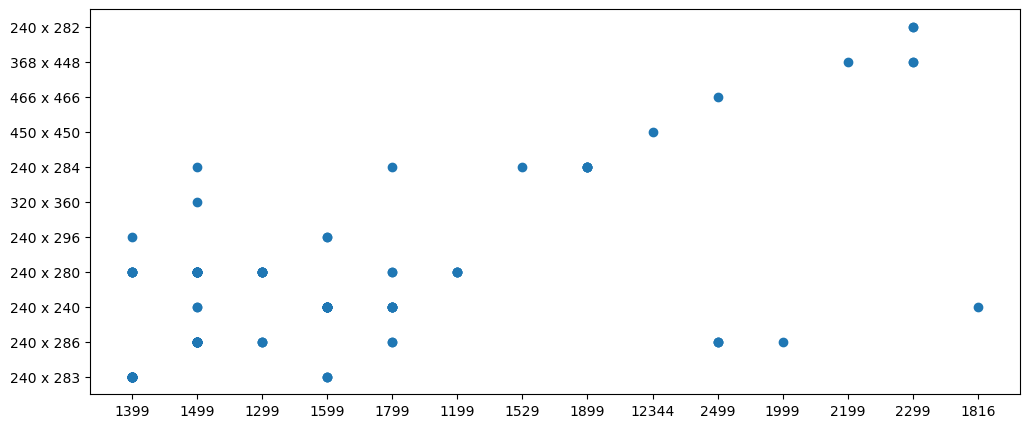

In [177]:
#Display Resolution among different prices
plt.figure(figsize=(12,5))
plt.scatter(df.Price,df.Display_Resolution)

<Axes: xlabel='Strap_Color'>

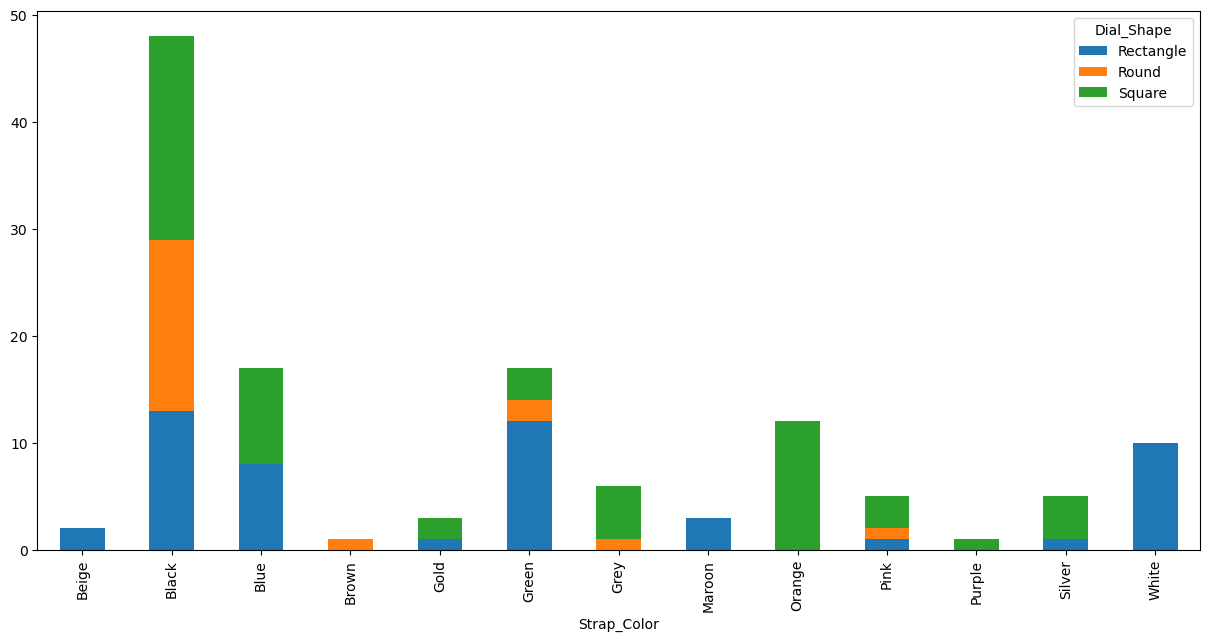

In [178]:
## Dial shape available in different colours
crosstab = pd.crosstab(df.Strap_Color,df.Dial_Shape)
crosstab.plot(kind='bar',stacked=True,figsize=(15,7))

<Axes: xlabel='Brand', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Boult'),
  Text(1, 0, 'Noise'),
  Text(2, 0, 'Fire-Boltt'),
  Text(3, 0, 'beatXP'),
  Text(4, 0, 'boAt'),
  Text(5, 0, 'Ambrane'),
  Text(6, 0, 'Fastrack'),
  Text(7, 0, 'SAMSUNG '),
  Text(8, 0, 'DIZO Watch D 1.8 inch Dyna')])

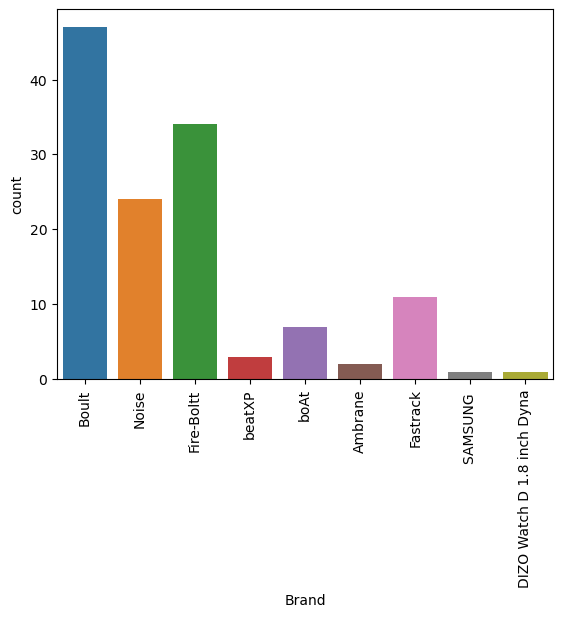

In [179]:
#Bivariant
#Count plot:
sns.countplot(x='Brand',data=df)
plt.xticks(rotation=90)

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Strap_Color')

<Axes: title={'center': 'Strap_Color'}, xlabel='Strap_Color', ylabel='count'>

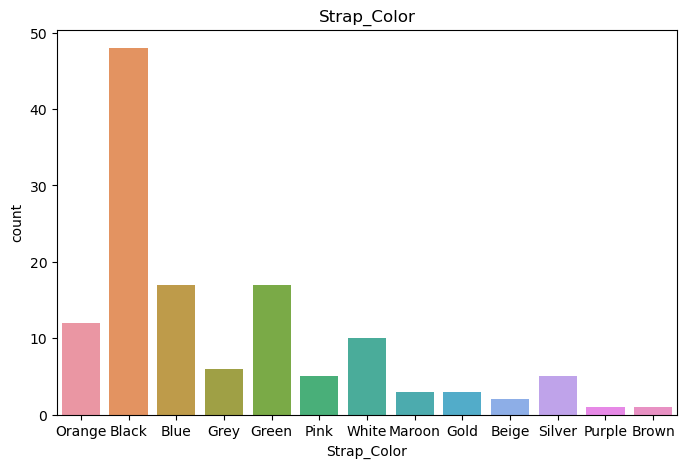

In [49]:
plt.figure(figsize=(8,5))
plt.title('Strap_Color')
sns.countplot(x='Strap_Color',data=df)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

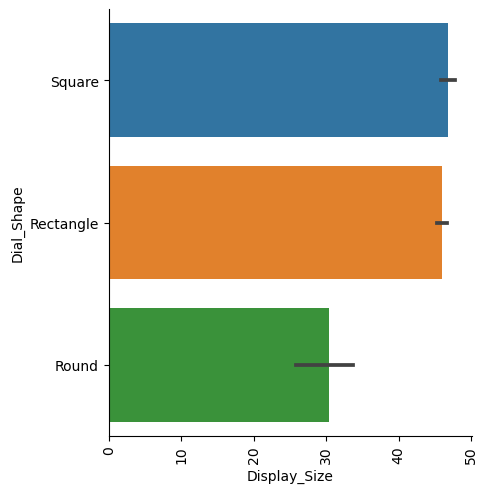

In [180]:
sns.catplot(data=df, x= 'Display_Size', y= 'Dial_Shape', kind= 'bar' )
plt.xticks (rotation=90)
plt. show()

<Axes: xlabel='Battery_Life', ylabel='Call_Function'>

Text(0.5, 1.0, 'Battery Analysis')

Text(0, 0.5, 'Call_Function')

Text(0.5, 0, 'Life')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

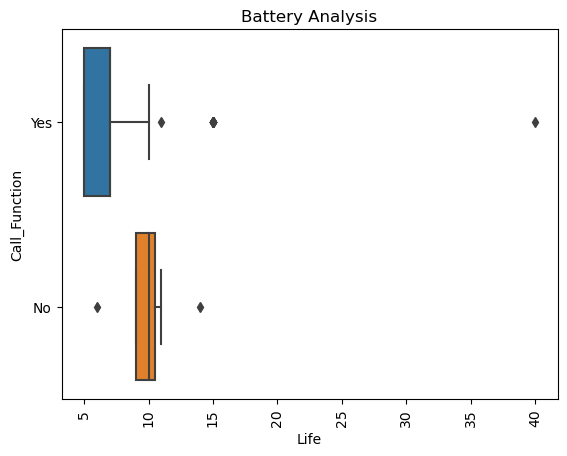

In [181]:
sns.boxplot(x='Battery_Life' ,y = 'Call_Function',data=df)
plt.title("Battery Analysis")
plt.ylabel('Call_Function')
plt.xlabel('Life')
plt.xticks(rotation=90)
plt.show()